## Methods to initialize patches data structure  

In [1]:
%matplotlib inline
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import face
# from features3D import PatchExtractor3D
from tomo_encoders import Patches
import pandas as pd
import numpy as np

In [2]:
# vol_shape = (351, 2500,65)
vol_shape = (351, 350, 340)

In [3]:
def plot_3D_feature(p, fig, plot_type = 'centers', ife = 0):
    
    ax = fig.add_subplot(projection='3d')
    
    if plot_type == 'centers':
        ax.scatter(p.centers()[:,0], p.centers()[:,1], p.centers()[:,2], c = p.features[:,ife])
    elif plot_type == 'corners':
        ax.scatter(p.points[:,0], p.points[:,1], p.points[:,2], c = p.features[:,ife])
        
    ax.set_xlim3d(0, p.vol_shape[0])
    ax.set_ylim3d(0, p.vol_shape[1])
    ax.set_zlim3d(0, p.vol_shape[2])    
    return

def plot_2D_planes(p, ax):
    
    ivals = [(0, 1, 2), (1, 0, 2), (2, 0, 1)]

    for ival in ivals:
        ip, i1, i2 = ival
        ax[ip].scatter(p.centers()[:,i1], p.centers()[:,i2], c = p.widths[:,0])
        ax[ip].set_xlim([0, vol_shape[i1]])
        ax[ip].set_ylim([0, vol_shape[i1]])    

**test initialization with multiple widths on a grid**

(243, 3)


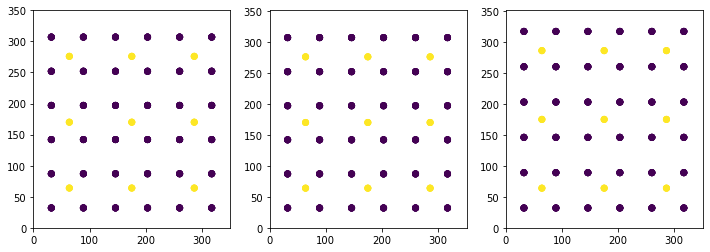

In [4]:
model_size = (64,64,64)
kwargs = {"initialize_by" : 'multiple-grids',
          "min_patch_size" : model_size, \
          "max_stride" : 2, "n_points" : None}
p_random = Patches(vol_shape, **kwargs)
print(p_random.points.shape)
fig, ax = plt.subplots(1,3, figsize = (12,4))
plot_2D_planes(p_random, ax)
p_random._check_valid_points()

(100, 3)


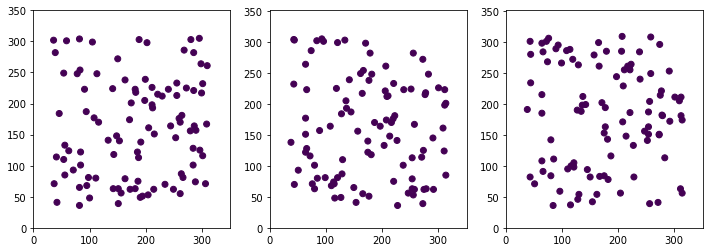

In [5]:
model_size = (64,64,64)
kwargs = {"initialize_by" : 'random-fixed-width',
          "patch_size" : model_size, \
          "n_points" : 100}
p_random = Patches(vol_shape, **kwargs)
print(p_random.points.shape)
fig, ax = plt.subplots(1,3, figsize = (12,4))
plot_2D_planes(p_random, ax)
p_random._check_valid_points()

(100, 3)


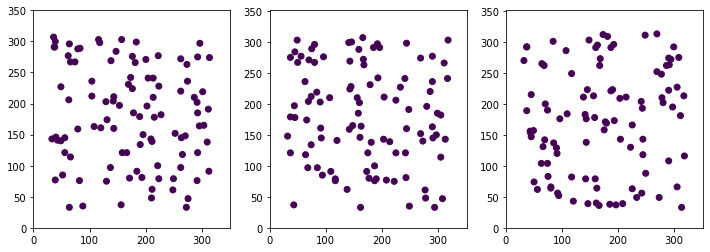

In [6]:
model_size = (64,64,64)
kwargs = {"initialize_by" : 'random',
          "min_patch_size" : model_size, \
          "max_stride" : 2, "n_points" : 100}
p_random = Patches(vol_shape, **kwargs)
print(p_random.points.shape)
fig, ax = plt.subplots(1,3, figsize = (12,4))
plot_2D_planes(p_random, ax)
p_random._check_valid_points()

**test append patches to self**

In [7]:
model_size = (64,64,64)
max_stride = 2
nf = 5
n_points = 100
initialize_by = 'random'
p1 = Patches(vol_shape, initialize_by = initialize_by, \
                   min_patch_size = model_size, \
             max_stride = max_stride, n_points = n_points)

p1.add_features(np.random.normal(0, 1, (p1.points.shape[0], nf)),\
                  names = ['h%02d'%i for i in range(nf)])

In [8]:
nf = 5
max_stride = 2
n_points = 100
p2 = Patches(vol_shape, initialize_by = initialize_by, \
                   min_patch_size = model_size, \
             max_stride = max_stride, n_points = n_points, \
             features = np.random.normal(0, 1, (n_points, nf)), \
             names = ['h%02d'%i for i in range(nf)])

In [9]:
p1.append(p2)
print(p1.points.shape)
print(p1.features.shape)
print(p1.feature_names)

(200, 3)
(200, 5)
['h00', 'h01', 'h02', 'h03', 'h04']


**test select random sample; select by indices**

In [10]:
p2_sel = p2.select_by_indices([0,10,20])
p2_sel.points[:3]

array([[155,  13, 121],
       [ 48, 220,  59],
       [114, 249, 192]])

In [11]:
p2_rand_sel = p2.select_random_sample(10)
p2_rand_sel.points[:3]

array([[246, 176,  30],
       [222,  15, 267],
       [ 70, 263, 151]])